# LIbraries

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import chi2_contingency
from wordcloud import WordCloud

# Read Data

In [41]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    return df
df=read_csv('500_Reddit_users_posts_labels.csv')

In [42]:
df.head()

,User,Post,Label
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive
1,user-1,['It can be hard to appreciate the notion that...,Ideation
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior
3,user-3,['I tried to kill my self once and failed badl...,Attempt
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation


# Preprocess

In [43]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    clean_text = ' '.join(tokens)
    return clean_text

In [44]:
df['Post'] = df['Post'].apply(preprocess_text)
df.head()

,User,Post,Label
0,user-0,viable option youll leaving wife behind youd p...,Supportive
1,user-1,hard appreciate notion could meet someone else...,Ideation
2,user-2,hi last night sitting ledge window contemplati...,Behavior
3,user-3,tried kill self failed badly cause moment want...,Attempt
4,user-4,hi nem sort thing enjoy personally always welc...,Ideation


# Label Encodeing 

In [45]:
label_encoder = LabelEncoder()
df['User'] = label_encoder.fit_transform(df['User'])
df['Label'] = label_encoder.fit_transform(df['Label'])
df.head()

,User,Post,Label
0,0,viable option youll leaving wife behind youd p...,4
1,1,hard appreciate notion could meet someone else...,2
2,112,hi last night sitting ledge window contemplati...,1
3,223,tried kill self failed badly cause moment want...,0
4,334,hi nem sort thing enjoy personally always welc...,2


# Split the data into A & B 

In [46]:
median_label = np.median(df['Label'])
print("Median label:", median_label)
group_A = df[df['Label'] <= median_label]
group_B = df[df['Label'] > median_label]

Median label: 2.0


# Perform Staixtical analysis 

In [47]:
group_A_label_counts = group_A['Label'].value_counts()
group_B_label_counts = group_B['Label'].value_counts()




# CHI Square Test

In [48]:

label_counts = pd.concat([group_A_label_counts, group_B_label_counts], axis=1, keys=['Group_A', 'Group_B']).fillna(0)
chi2, p_value, _, _ = chi2_contingency(label_counts)
if p_value < 0.05:
    print("There is a statistically significant difference between the distributions of labels in Group A and Group B.")
    significant_labels = label_counts[label_counts['Group_A'] != label_counts['Group_B']].index
else:
    print("There is no statistically significant difference between the distributions of labels in Group A and Group B.")


There is a statistically significant difference between the distributions of labels in Group A and Group B.


# Recomendations 

In [49]:
if p_value < 0.05:
    print("Recommendation:")
    print("Further investigate the posts associated with significant labels to understand the underlying factors driving the difference between Group A and Group B.")
    print("Consider adjusting the intervention or change based on insights gained from the analysis to optimize outcomes.")

else:
    print("Recommendation:")
    print("Evaluate other aspects of the intervention or change that may not have been captured in the analysis.")
    print("Explore alternative strategies or modifications to improve the effectiveness of the intervention.")


Recommendation:
Further investigate the posts associated with significant labels to understand the underlying factors driving the difference between Group A and Group B.
Consider adjusting the intervention or change based on insights gained from the analysis to optimize outcomes.


# Distribution 

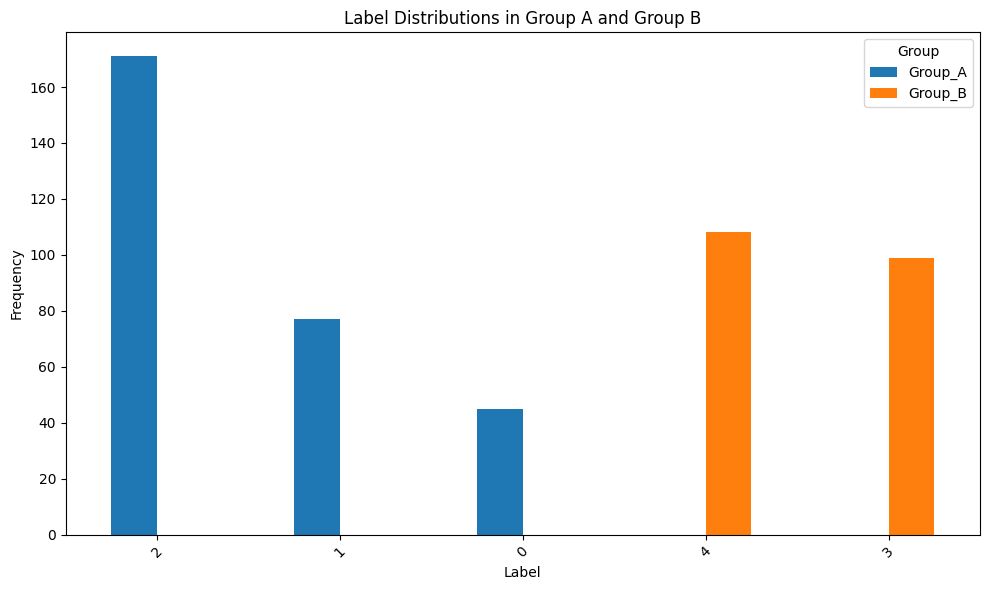

In [50]:
label_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Label Distributions in Group A and Group B')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

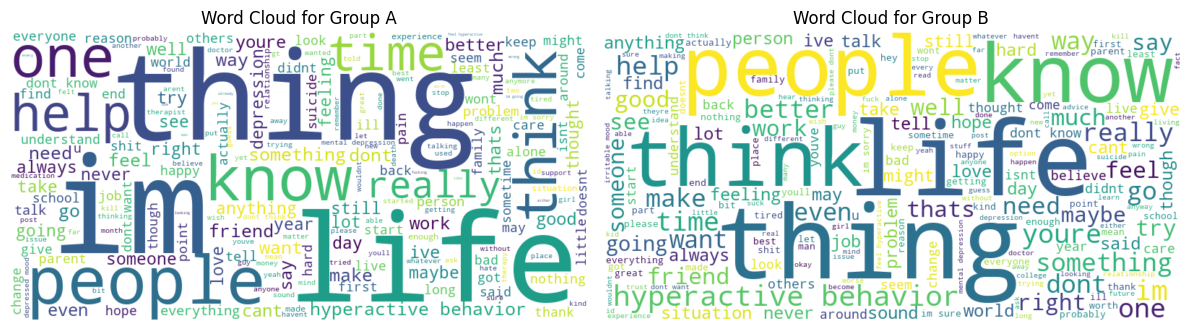

In [51]:


significant_posts_group_A = group_A[group_A['Label'].isin(significant_labels)]['Post']
significant_posts_group_B = group_B[group_B['Label'].isin(significant_labels)]['Post']

all_posts_group_A = ' '.join(significant_posts_group_A)
all_posts_group_B = ' '.join(significant_posts_group_B)
wordcloud_group_A = WordCloud(width=800, height=400, background_color='white').generate(all_posts_group_A)
wordcloud_group_B = WordCloud(width=800, height=400, background_color='white').generate(all_posts_group_B)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_group_A, interpolation='bilinear')
plt.title('Word Cloud for Group A')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_group_B, interpolation='bilinear')
plt.title('Word Cloud for Group B')
plt.axis('off')

plt.tight_layout()
plt.show()


# Histogram ON Length

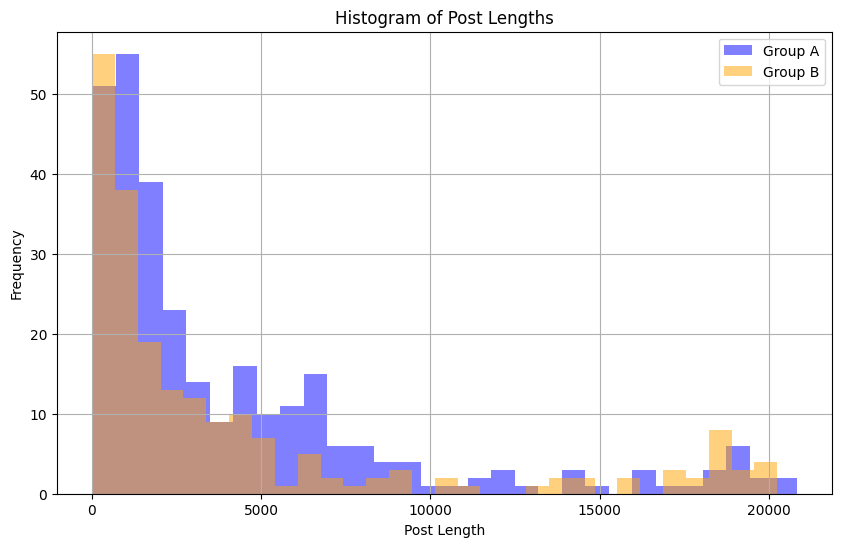

In [52]:

post_lengths_group_A = significant_posts_group_A.apply(len)
post_lengths_group_B = significant_posts_group_B.apply(len)

plt.figure(figsize=(10, 6))
plt.hist(post_lengths_group_A, bins=30, alpha=0.5, label='Group A', color='blue')
plt.hist(post_lengths_group_B, bins=30, alpha=0.5, label='Group B', color='orange')
plt.title('Histogram of Post Lengths')
plt.xlabel('Post Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
